In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Pfam and GO associated with predicted proteins

In [29]:
file_meta = "./foldseekCluster90_1E-5_meta_single_interproscan_tmp.csv" # can be created with single_interproscan_annotation.ipynb
df_meta = pd.read_csv(file_meta)

file_stats = "./foldseekCluster90_1E-5_stats_single_interproscan_1E-3.csv" # can be created with single_interproscan_annotation.ipynb
df_stats = pd.read_csv(file_stats)

In [ ]:
df_pfam_go = pd.DataFrame(columns=['cluster_member', 'pfam_go_term'])

n = 0

for i, row in df_meta[df_meta['Pfam_GO'].notna()].iterrows():
    
    cluster_member = row['cluster_member']
    pfam_go_terms = row['Pfam_GO'].split('|')
    
    for term in pfam_go_terms:
        term = term.rstrip('(InterPro)')
        new_row = pd.DataFrame([{
                'cluster_member': cluster_member,
                'pfam_go_term': term}])
        df_pfam_go = pd.concat([df_pfam_go, new_row], ignore_index=True)
    
    n += 1
    print(n, cluster_member)

In [32]:
df_pfam_go

,cluster_member,pfam_go_term
0,CF-AAX47043.1.11_10545_relaxed,GO:0003723
1,CF-AAX47043.1.11_10545_relaxed,GO:0003968
2,CF-AAX47043.1.11_10545_relaxed,GO:0006351
3,CF-ABK41188.1.11_10539_relaxed,GO:0003723
4,CF-ABK41188.1.11_10539_relaxed,GO:0003968
...,...,...
60819,CF-CAA27948.1_93_relaxed,GO:0075733
60820,CF-CAA37541.1_10126_relaxed,GO:0019031
60821,CF-AAA47931.1.1_10363_relaxed,GO:0019030
60822,CF-AAA48498.2.1_7188_relaxed,GO:0005198


In [33]:
# merge df_meta and df_pfam_go
df_meta = df_meta.merge(df_pfam_go, on='cluster_member', how='left')

df_meta.drop(columns=[
    'Pfam_GO',
    'Pfam_start',
    'Pfam_stop',
    'Gene3D',
    'Gene3D_start',
    'Gene3D_stop',
    'SUPERFAMILY',
    'SUPERFAMILY_start',
    'SUPERFAMILY_stop',
    ], inplace=True)

In [34]:
file_go_basic = "./go-basic.obo"

with open(file_go_basic, 'r') as f:
    go_basic = f.read()
    go_basic_blocks = go_basic.split('\n\n')

go_basic_dict = {'id': [],
                 'name': [],
                 'namespace': []}

for block in go_basic_blocks:
    
    if block.startswith('[Term]'):
        
        block_lines = block.split('\n')

        for line in block_lines:
            
            if line.startswith('id:'):
                go_id = line.split('id: ')[1]
            if line.startswith('name:'):
                go_name = line.split('name: ')[1]
            if line.startswith('namespace:'):
                go_namespace = line.split('namespace: ')[1]
        
        go_basic_dict['id'].append(go_id)
        go_basic_dict['name'].append(go_name)
        go_basic_dict['namespace'].append(go_namespace)

go_basic_df = pd.DataFrame(go_basic_dict)

In [35]:
# Merge the GO terms with the basic GO terms
df_meta = df_meta.merge(go_basic_df, left_on='pfam_go_term', right_on='id', how='left')
df_meta.drop(columns=['id'], inplace=True)
df_meta.rename(columns={
    'pfam_go_term': 'go_id',
    'name': 'go_name',
    'namespace': 'go_type'}, inplace=True)

In [36]:
df_meta

,cluster_id,cluster_representative,structure_representative,cluster_member,clustering_method,member_class,member_record_id,protlen,plddt,ptm,ictv_sort,ictv_species,genbank_name,Pfam,go_id,go_name,go_type
0,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AAX47043.1.11_10545_relaxed,mmseq,CF,AAX47043.1.11_10545,462,96.4,0.94,10545,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0003723,RNA binding,molecular_function
1,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AAX47043.1.11_10545_relaxed,mmseq,CF,AAX47043.1.11_10545,462,96.4,0.94,10545,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0003968,RNA-dependent RNA polymerase activity,molecular_function
2,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AAX47043.1.11_10545_relaxed,mmseq,CF,AAX47043.1.11_10545,462,96.4,0.94,10545,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0006351,DNA-templated transcription,biological_process
3,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ABK41188.1.11_10539_relaxed,mmseq,CF,ABK41188.1.11_10539,462,96.5,0.94,10539,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0003723,RNA binding,molecular_function
4,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ABK41188.1.11_10539_relaxed,mmseq,CF,ABK41188.1.11_10539,462,96.5,0.94,10539,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0003968,RNA-dependent RNA polymerase activity,molecular_function
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114760,19063,CF-BAF45662.1_12759_relaxed,CF-BAF45662.1_12759_relaxed,CF-BAF45662.1_12759_relaxed,foldseek,CF,BAF45662.1_12759,128,94.0,0.52,12759,Ichnoviriform fugitivi,Product: polar residue rich protein-b13.1,NaN,NaN,NaN,NaN
114761,19064,CF-BAF45663.1_12759_relaxed,CF-BAF45663.1_12759_relaxed,CF-BAF45663.1_12759_relaxed,foldseek,CF,BAF45663.1_12759,116,53.3,0.23,12759,Ichnoviriform fugitivi,Product: b13.3,NaN,NaN,NaN,NaN
114762,19065,CF-BAF45664.1_12759_relaxed,CF-BAF45664.1_12759_relaxed,CF-BAF45664.1_12759_relaxed,foldseek,CF,BAF45664.1_12759,159,79.7,0.41,12759,Ichnoviriform fugitivi,Product: polar residue rich protein-b13.2,NaN,NaN,NaN,NaN
114763,19066,CF-BAF45668.1_12759_relaxed,CF-BAF45668.1_12759_relaxed,CF-BAF45668.1_12759_relaxed,foldseek,CF,BAF45668.1_12759,139,41.3,0.23,12759,Ichnoviriform fugitivi,Product: b16.1,NaN,NaN,NaN,NaN


In [37]:
df_meta.to_csv('./foldseekCluster90_1E-5_meta_multiple_go_tmp.csv', index=False)

## Step 2: Replace DNA-templated transcription with RNA-templated transcription for RdRps

- Accession GO:0001172
- Name RNA-templated transcription
- Ontology biological_process
---
- Accession GO:0006351
- Name DNA-templated transcription
- Ontology biological_process

In [38]:
file = './foldseekCluster90_1E-5_meta_multiple_go_tmp.csv'
df = pd.read_csv(file)

In [45]:
df.iloc[:10,:]

,cluster_id,cluster_representative,structure_representative,cluster_member,clustering_method,member_class,member_record_id,protlen,plddt,ptm,ictv_sort,ictv_species,genbank_name,Pfam,go_id,go_name,go_type
0,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AAX47043.1.11_10545_relaxed,mmseq,CF,AAX47043.1.11_10545,462,96.4,0.94,10545,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0003723,RNA binding,molecular_function
1,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AAX47043.1.11_10545_relaxed,mmseq,CF,AAX47043.1.11_10545,462,96.4,0.94,10545,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0003968,RNA-dependent RNA polymerase activity,molecular_function
2,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AAX47043.1.11_10545_relaxed,mmseq,CF,AAX47043.1.11_10545,462,96.4,0.94,10545,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0001172,RNA-templated transcription,biological_process
3,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ABK41188.1.11_10539_relaxed,mmseq,CF,ABK41188.1.11_10539,462,96.5,0.94,10539,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0003723,RNA binding,molecular_function
4,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ABK41188.1.11_10539_relaxed,mmseq,CF,ABK41188.1.11_10539,462,96.5,0.94,10539,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0003968,RNA-dependent RNA polymerase activity,molecular_function
5,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ABK41188.1.11_10539_relaxed,mmseq,CF,ABK41188.1.11_10539,462,96.5,0.94,10539,Enterovirus B,3D,Viral RNA-dependent RNA polymerase,GO:0001172,RNA-templated transcription,biological_process
6,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ACZ67658.1.11_10757_relaxed,mmseq,CF,ACZ67658.1.11_10757,460,95.7,0.93,10757,Rhinovirus C,Polymerase,Viral RNA-dependent RNA polymerase,GO:0003723,RNA binding,molecular_function
7,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ACZ67658.1.11_10757_relaxed,mmseq,CF,ACZ67658.1.11_10757,460,95.7,0.93,10757,Rhinovirus C,Polymerase,Viral RNA-dependent RNA polymerase,GO:0003968,RNA-dependent RNA polymerase activity,molecular_function
8,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-ACZ67658.1.11_10757_relaxed,mmseq,CF,ACZ67658.1.11_10757,460,95.7,0.93,10757,Rhinovirus C,Polymerase,Viral RNA-dependent RNA polymerase,GO:0001172,RNA-templated transcription,biological_process
9,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AGH70290.1.11_10579_relaxed,mmseq,CF,AGH70290.1.11_10579,461,96.4,0.94,10579,Enterovirus C,3D,Viral RNA-dependent RNA polymerase,GO:0003723,RNA binding,molecular_function


In [41]:
rdrp_pfam = [
    'RNA-dependent RNA polymerase',
    'RNA dependent RNA polymerase',
    'RNA-directed RNA polymerase',
    'Arenavirus RNA polymerase',
    'Influenza RNA polymerase']

rdrps_cluster_id = list(df[(df['Pfam'].notna()) &
                      (df['Pfam'].str.contains('|'.join(rdrp_pfam)))]['cluster_id'].unique())

In [44]:
for index, row in df.iterrows():
    if row["cluster_id"] in rdrps_cluster_id:
        if row["go_name"] == "DNA-templated transcription":
            df.at[index, "go_id"] = "GO:0001172"
            df.at[index, "go_name"] = "RNA-templated transcription"

In [46]:
output = './foldseekCluster90_1E-5_meta_multiple_go_RdRp_corrected_tmp.csv'
df.to_csv(output, index=False)

## Step 3: Leave only one GO annotation per type

In [47]:
file_go_terms = "./foldseekCluster90_1E-5_meta_multiple_go_RdRp_corrected_tmp.csv"
file_meta = "./foldseekCluster90_1E-5_meta_single_interproscan_1E-3.csv"

df_meta = pd.read_csv(file_meta)
df_go_terms = pd.read_csv(file_go_terms)

In [52]:
df_meta.drop(columns=[
    'Gene3D_annotation_type',
    'Gene3D_annotation',
    'Gene3D_ratio',
    'SUPERFAMILY_annotation_type',
    'SUPERFAMILY_annotation',
    'SUPERFAMILY_ratio'], inplace=True)

In [ ]:
n = 0

for index, row in df_meta.iterrows():

    n += 1
    cluster_member = row["cluster_member"]

    for go_type in ["molecular_function", "biological_process", "cellular_component"]:

        try:
            go_names = list(df_go_terms[(df_go_terms["cluster_member"] == cluster_member) &
                                (df_go_terms["go_type"] == go_type)]["go_name"].values)

            top_go_name = go_names[0]

            if len(go_names) > 1:
                for go_name in go_names:
                    if "binding" not in go_name:
                        top_go_name = go_name
                        break
        
        except IndexError:
            top_go_name = np.nan

        print(n, cluster_member, go_type, top_go_name)
        df_meta.loc[index, go_type] = top_go_name

In [ ]:
output = "./foldseekCluster90_1E-5_meta_single_go_annotation_tmp.csv"
df_meta.to_csv(output, index=False)

## Step 4: Expand GO annotation to other cluster members

### Create a summary file

In [34]:
file_meta = "./foldseekCluster90_1E-5_meta_single_go_annotation_tmp.csv"
file_stats = "./foldseekCluster90_1E-5_stats_single_interproscan_1E-3.csv"
df_meta = pd.read_csv(file_meta)
df_stats = pd.read_csv(file_stats)

In [4]:
df_meta.iloc[:1,:]

,cluster_id,cluster_representative,structure_representative,cluster_member,clustering_method,member_class,member_record_id,protlen,plddt,ptm,ictv_sort,ictv_species,genbank_name,Pfam_annotation_type,Pfam_annotation,Pfam_ratio,molecular_function,biological_process,cellular_component
0,1,CF-AKH10573.1.1.6_7109_relaxed,CF-BAA24003.1.11_10589_relaxed,CF-AAX47043.1.11_10545_relaxed,mmseq,CF,AAX47043.1.11_10545,462,96.4,0.94,10545,Enterovirus B,3D,Pfam,Viral RNA-dependent RNA polymerase,NaN,RNA-dependent RNA polymerase activity,RNA-templated transcription,NaN


In [5]:
# fill NA with '-'
df_meta['molecular_function'].fillna('-', inplace=True)
df_meta['biological_process'].fillna('-', inplace=True)
df_meta['cellular_component'].fillna('-', inplace=True)

In [35]:
df_stats.columns
df_stats.drop(columns=[
    'Gene3D_annotation_type',
    'Gene3D_annotation',
    'Gene3D_ratio',
    'SUPERFAMILY_annotation_type',
    'SUPERFAMILY_annotation',
    'SUPERFAMILY_ratio'
    ], inplace=True)

In [ ]:
# Create csv files with the annotation summary of the clusters

df = pd.DataFrame(columns=['cluster_id', 'go_type', 'go_name', 'go_name_count'])

for go_type in ["molecular_function", "biological_process", "cellular_component"]:
#for go_type in ["molecular_function"]:

    for i, row in df_meta.iterrows():
        
        cluster_id = row['cluster_id']
        go_name = row[f'{go_type}']

        if go_name not in df[(df['cluster_id'] == cluster_id) &
                             (df['go_type'] == go_type)]['go_name'].values:
            
            df_sub = df_meta[(df_meta['cluster_id'] == cluster_id) &
                             (df_meta[f'{go_type}'] == go_name)]
            
            count = df_sub.shape[0]

            new_row = pd.DataFrame([{
                'cluster_id': cluster_id,
                'go_type': go_type,
                'go_name': go_name,
                'go_name_count': count
            }])

            df = pd.concat([df, new_row], ignore_index=True)

        print(i, cluster_id, go_name, count)

In [ ]:
df.sort_values(by=['cluster_id', 'go_type', 'go_name_count'], ascending=[True, True, False], inplace=True)
df = df_stats.merge(df, on='cluster_id')

In [ ]:
output = "./functional_annotation/foldseekCluster90_1E-5_stats_GO_summary.csv"
df.to_csv(output, index=False)

### Create a stats file

In [36]:
file_all_summary = "./functional_annotation/foldseekCluster90_1E-5_stats_GO_summary.csv"
df_all_summary = pd.read_csv(file_all_summary)

In [ ]:
# Create stats CSV file top annotation for each cluster and its ratio
# (portion of annotated records in the cluster that share the top annotation)

for go_type in ["molecular_function", "biological_process", "cellular_component"]:
    
    df_summary = df_all_summary[df_all_summary['go_type'] == go_type]

    for index, row in df_stats.iterrows():
        
        cluster_id = row['cluster_id']
        
        df = df_summary[df_summary['cluster_id'] == cluster_id]
        
        cluster_size = df['cluster_size'].values[0]
        
        try:
            top_annotation = df[df['go_name'] != '-']['go_name'].values[0]
            top_annotation_count = df[df['go_name'] != '-']['go_name_count'].values[0]
        except IndexError:
            top_annotation = np.nan
            top_annotation_count = 0
        
        try:
            no_annotation_count = df[df['go_name'] == '-']['go_name_count'].values[0]
        except IndexError:
            no_annotation_count = 0

        top_annotation_ratio = round(top_annotation_count / (cluster_size - no_annotation_count), 2)

        if pd.isnull(top_annotation):
            df_stats.loc[index, f'{go_type}_annotation_type'] = np.nan
            df_stats.loc[index, f'{go_type}_annotation'] = np.nan
            df_stats.loc[index, f'{go_type}_ratio'] = np.nan
        else:
            df_stats.loc[index, f'{go_type}_annotation_type'] = "cluster"
            df_stats.loc[index, f'{go_type}_annotation'] = top_annotation
            df_stats.loc[index, f'{go_type}_ratio'] = top_annotation_ratio

        print(cluster_id, cluster_size, top_annotation, top_annotation_ratio)

In [39]:
output = "./foldseekCluster90_1E-5_stats_single_go.csv"
df_stats.to_csv(output, index=False)

## Step 5: Expand annotation to other network nodes

In [32]:
file_meta_position = "./foldseekCluster90_1E-5_meta_single_interproscan_tmp.csv"
file_meta_go = "./foldseekCluster90_1E-5_meta_single_go_annotation_tmp.csv"
file_stats = "./foldseekCluster90_1E-5_stats_single_go.csv"
file_foldseek = "./foldseek_structure_reps_all_vs_all/foldseekCluster90_structure_reps_all_vs_all.tsv"

df_meta_position = pd.read_csv(file_meta_position)
df_meta_go = pd.read_csv(file_meta_go)
df_stats = pd.read_csv(file_stats)
df_foldseek = pd.read_csv(file_foldseek, sep="\t")

In [33]:
df_meta = df_meta_position.merge(df_meta_go[[
    'cluster_member',
    'molecular_function',
    'biological_process',
    'cellular_component'
]], on='cluster_member', how='left')

In [34]:
df_meta.drop(columns=[
    'Pfam_GO',
    'Gene3D',
    'Gene3D_start',
    'Gene3D_stop',
    'SUPERFAMILY',
    'SUPERFAMILY_start',
    'SUPERFAMILY_stop'], inplace=True)


In [35]:
df_stats = df_stats.merge(df_meta[[
    'cluster_member',
    'Pfam',
    'Pfam_start',
    'Pfam_stop',
    'molecular_function',
    'biological_process',
    'cellular_component'
    ]], left_on='structure_representative', right_on='cluster_member', how='left')

df_stats.drop(columns=['cluster_member'], inplace=True)

In [36]:
# leave only df rows that have cluster_representative from df_stats in query column
df_foldseek = df_foldseek[df_foldseek["query"].isin(df_stats[df_stats["structure_representative_plddt"] > 50]["structure_representative"])]
df_foldseek = df_foldseek[df_foldseek["target"].isin(df_stats[df_stats["structure_representative_plddt"] > 50]["structure_representative"])]

# filter out non-significant hits
df_foldseek = df_foldseek[df_foldseek['evalue'] < 1e-3]

# filter out self hits
df_foldseek = df_foldseek[df_foldseek["query"] != df_foldseek["target"]]

In [37]:
# add top target annotations to the df_foldseek
for analysis in ["Pfam"]:

    df_foldseek = df_foldseek.merge(df_stats[['structure_representative',
                                              f'{analysis}',
                                              f'{analysis}_start',
                                              f'{analysis}_stop']], left_on='target', right_on='structure_representative')
    
    df_foldseek = df_foldseek.drop(columns=['structure_representative'])

    df_foldseek = df_foldseek.rename(columns={
        f'{analysis}': f'target_{analysis}_annotation',
        f'{analysis}_start': f'target_{analysis}_start',
        f'{analysis}_stop': f'target_{analysis}_stop'})

for go_type in ["molecular_function", "biological_process", "cellular_component"]:

    df_foldseek = df_foldseek.merge(df_stats[['structure_representative',
                                              f'{go_type}'
                                              ]], left_on='target', right_on='structure_representative')
    
    df_foldseek = df_foldseek.drop(columns=['structure_representative'])

    df_foldseek = df_foldseek.rename(columns={
        f'{go_type}': f'target_{go_type}'})

In [38]:
def calculate_overlap(tstart, tend, target_start, target_stop, overlap_threshold=0.9):
    '''
    Calculate the overlap between Foldseek target hit and InterProScan target annotation
    Should be used to filter out hits that do not overlap with the target annotation
    '''
    query_range = set(range(int(tstart), int(tend) + 1))
    target_range = set(range(int(target_start), int(target_stop) + 1))

    overlap = query_range.intersection(target_range)

    return len(overlap) >= (overlap_threshold * len(target_range))

### Update the stats file

In [ ]:
# Create a stats file where cluster annotation is propogated to cluster with no annotation using structure similarity network

for go_type in ["molecular_function", "biological_process", "cellular_component"]:

    df_foldseek_analysis = df_foldseek.dropna(subset=[f'target_{go_type}'])
    df_foldseek_analysis = df_foldseek_analysis[df_foldseek_analysis.apply(lambda row: calculate_overlap(row['tstart'], row['tend'], row[f'target_Pfam_start'], row[f'target_Pfam_stop']), axis=1)]
    
    for index, row in df_stats.iterrows():

        cluster_id = row["cluster_id"]
        cluster_str_rep = row['structure_representative']
        go_name = row[f'{go_type}']

        if pd.isnull(go_name):
            
            df_foldseek_sub = df_foldseek_analysis[df_foldseek_analysis['query'] == cluster_str_rep]
            annotated_members = df_foldseek_sub[df_foldseek_sub[f'target_{go_type}'].notna()].shape[0]
            
            if annotated_members > 0:

                community_size = df_foldseek_sub.shape[0]
                top_members = df_foldseek_sub[f'target_{go_type}'].value_counts().values[0]
                top_go_name = df_foldseek_sub[f'target_{go_type}'].value_counts().index[0]
                top_ratio = round(top_members / annotated_members, 2)

                df_stats.loc[index, f'{go_type}_annotation_type'] = 'network'
                df_stats.loc[index, f'{go_type}_annotation'] = top_go_name
                df_stats.loc[index, f'{go_type}_ratio'] = top_ratio

        print(cluster_id, go_name)

In [42]:
df_stats.drop(columns=[
    'Pfam',
    'Pfam_start',
    'Pfam_stop',
    'molecular_function',
    'biological_process',
    'cellular_component'
    ], inplace=True)

In [41]:
for go_type in ["molecular_function", "biological_process", "cellular_component"]:
    print(df_stats[f'{go_type}_annotation_type'].value_counts())

molecular_function_annotation_type
cluster    1442
network     715
Name: count, dtype: int64
biological_process_annotation_type
cluster    1168
network     496
Name: count, dtype: int64
cellular_component_annotation_type
cluster    666
network    251
Name: count, dtype: int64


In [43]:
output = "./foldseekCluster90_1E-5_stats_single_go_1E-3.csv"
df_stats.to_csv(output, index=False)

In [ ]:
for go_type in ["molecular_function", "biological_process", "cellular_component"]:

    plt.figure(figsize=(3, 4))

    sns.kdeplot(df_stats[df_stats[f'{go_type}_annotation_type'] == 'cluster'][f'{go_type}_ratio'],
                fill=True, clip=(0,1))

    # X-axis label
    plt.xlabel('Frequency of propagated annotation')

    #plt.savefig('./figures/network_annotation_probability_kde.png', dpi=600, bbox_inches='tight')
    #plt.savefig('./figures/network_annotation_probability_kde.svg', bbox_inches='tight', format='svg')

    plt.show()

In [ ]:
for go_type in ["molecular_function", "biological_process", "cellular_component"]:

    plt.figure(figsize=(3, 4))

    sns.kdeplot(df_stats[df_stats[f'{go_type}_annotation_type'] == 'network'][f'{go_type}_ratio'],
                fill=True, clip=(0,1))

    # X-axis label
    plt.xlabel('Frequency of propagated annotation')

    #plt.savefig('./figures/network_annotation_probability_kde.png', dpi=600, bbox_inches='tight')
    #plt.savefig('./figures/network_annotation_probability_kde.svg', bbox_inches='tight', format='svg')

    plt.show()

### Update the meta file with cluster info

In [ ]:
'''
Add functional annotation from the cluster expansion to the meta file
'''

for analysis in ["molecular_function", "biological_process", "cellular_component"]:

    for index, row in df_meta.iterrows():
        
        cluster_id = row['cluster_id']
        cluster_rep = row['cluster_representative']
        description = row[f'{analysis}']

        if pd.isnull(description):
            
            top_description = df_stats[df_stats['cluster_representative'] == cluster_rep][f'{analysis}_annotation'].values[0]
            top_ratio = df_stats[df_stats['cluster_representative'] == cluster_rep][f'{analysis}_ratio'].values[0]
            
            if pd.isnull(top_description):
                df_meta.loc[index, f'{analysis}_annotation_type'] = np.nan
            else:
                df_meta.loc[index, f'{analysis}_annotation_type'] = "cluster"
            
            df_meta.loc[index, f'{analysis}_annotation'] = top_description
            df_meta.loc[index, f'{analysis}_ratio'] = top_ratio
                
        else:
            
            df_meta.loc[index, f'{analysis}_annotation_type'] = analysis
            df_meta.loc[index, f'{analysis}_annotation'] = description
            df_meta.loc[index, f'{analysis}_ratio'] = np.nan

        print(cluster_id, description)

In [50]:
df_meta.drop(columns=[
    'Pfam',
    'Pfam_start',
    'Pfam_stop',
    'molecular_function',
    'biological_process', 
    'cellular_component',
    ], inplace=True)

In [52]:
df_meta.to_csv("./foldseekCluster90_1E-5_meta_single_go_1E-3.csv", index=False)

### Update the meta file with network info

In [ ]:
'''
Add functional annotation from the cluster expansion to the meta file
'''

for analysis in ["molecular_function", "biological_process", "cellular_component"]:
    
    for index, row in df_stats[df_stats[f'{analysis}_annotation_type'] == 'network'].iterrows():
    
        cluster_id = row['cluster_id']
        cluster_rep = row['cluster_representative']
        
        annotation_type = row[f'{analysis}_annotation_type']
        annotation = row[f'{analysis}_annotation']
        annotation_probability = row[f'{analysis}_ratio']

        df_meta.loc[df_meta['cluster_representative'] == cluster_rep, f'{analysis}_annotation_type'] = annotation_type
        df_meta.loc[df_meta['cluster_representative'] == cluster_rep, f'{analysis}_annotation'] = annotation
        df_meta.loc[df_meta['cluster_representative'] == cluster_rep, f'{analysis}_ratio'] = annotation_probability

        print(cluster_id, annotation)

In [55]:
for go_type in ["molecular_function", "biological_process", "cellular_component"]:
    print(df_meta[f'{go_type}_annotation_type'].value_counts())

molecular_function_annotation_type
molecular_function    20892
network                7262
cluster                2026
Name: count, dtype: int64
biological_process_annotation_type
biological_process    16141
network                6060
cluster                1805
Name: count, dtype: int64
cellular_component_annotation_type
cellular_component    8322
network               2508
cluster               1276
Name: count, dtype: int64


In [56]:
df_meta.to_csv("./foldseekCluster90_1E-5_meta_single_go_1E-3.csv", index=False)

## Step 6: Visualize functional expansion

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

### Frequency of propagated annotation

In [58]:
file_meta = "./foldseekCluster90_1E-5_meta_single_go_1E-3.csv"
df_meta = pd.read_csv(file_meta)

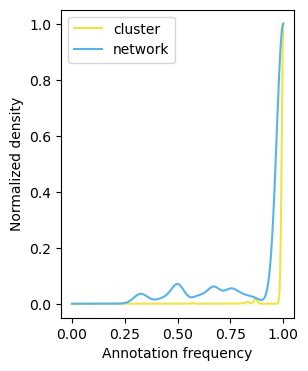

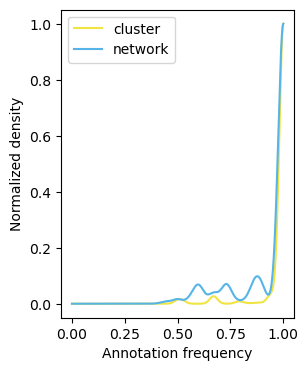

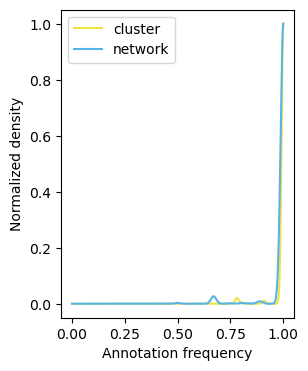

In [61]:
for analysis in ["molecular_function", "biological_process", "cellular_component"]:

    # Assuming df_meta is your DataFrame and it has columns 'Pfam_annotation_probability' and 'Pfam_annotation_type'
    # Split the data based on 'Pfam_annotation_type'
    data1 = df_meta[df_meta[f'{analysis}_annotation_type'] == 'cluster'][f'{analysis}_ratio']
    data2 = df_meta[df_meta[f'{analysis}_annotation_type'] == 'network'][f'{analysis}_ratio']

    # Compute KDE
    kde1 = gaussian_kde(data1)
    kde2 = gaussian_kde(data2)

    # Create a range of values for the x-axis
    x = np.linspace(0, 1, 1000)

    # Compute the densities
    density1 = kde1(x)
    density2 = kde2(x)

    # Normalize the densities
    density1 /= density1.max()
    density2 /= density2.max()

    # Plot the normalized densities
    plt.figure(figsize=(3, 4))
    plt.plot(x, density1, label='cluster', color='#F0E442')
    plt.plot(x, density2, label='network', color='#56B4E9')
    plt.xlabel('Annotation frequency')
    plt.ylabel('Normalized density')
    plt.legend()
    plt.savefig(f'./figures/go_{analysis}_propagated_annotation_frequency_kde.svg', bbox_inches='tight', format='svg')
    #plt.savefig(f'./figures/go_{analysis}_annotation_probability_kde.png', dpi=600, bbox_inches='tight')
    plt.show()

### Functional coverage

In [69]:
file_meta = "./foldseekCluster90_1E-5_meta_single_go_1E-3.csv"
df_meta = pd.read_csv(file_meta)
file_stats = "./foldseekCluster90_1E-5_stats_single_go_1E-3.csv"
df_stats = pd.read_csv(file_stats)
file_ictv = "~/1_dataset_preparation/msl38v2/VMR_MSL38_v2.xlsx"
df_ictv = pd.read_excel(file_ictv)

In [70]:
# merge df_meta with df_stats[['cluster_representative', 'cluster_size']]
df_meta = df_meta.merge(df_stats[['cluster_representative', 'cluster_size']], on='cluster_representative', how='left')

In [71]:
for analysis in ["molecular_function", "biological_process", "cellular_component"]:

    df_meta[f'{analysis}_annotation_type'] = df_meta.apply(
        lambda row: "singleton" if row["cluster_size"] == 1 and pd.isna(row[f'{analysis}_annotation_type']) else row[f'{analysis}_annotation_type'],
        axis=1)

In [72]:
df_ictv_sub = df_ictv[["Sort", "Realm"]]
# add realm to df_coverage
df_meta = pd.merge(df_meta, df_ictv_sub, left_on="ictv_sort", right_on="Sort", how="left")
# replace Nan in realm with "Other"
df_meta["Realm"].fillna("Unclassified", inplace=True)
df_coverage = df_meta["Realm"].value_counts().reset_index()
# change the index order: Riboviria, Monodnaviria, Unclassified, Varidnaviria, Duplodnaviria, Ribozyviria
df_coverage = df_coverage.reindex([1, 4, 2, 0, 3, 5])
df_coverage

,Realm,count
1,Riboviria,22453
4,Monodnaviria,4551
2,Unclassified,21224
0,Varidnaviria,25265
3,Duplodnaviria,11653
5,Ribozyviria,16


In [73]:
for analysis in ["molecular_function", "biological_process", "cellular_component"]:

    df_coverage[f'{analysis}'] = df_coverage['Realm'].apply(lambda x: df_meta[(df_meta['Realm'] == x) & (df_meta[f'{analysis}_annotation_type'] == f'{analysis}')].shape[0])
    df_coverage[f'{analysis}_cluster'] = df_coverage['Realm'].apply(lambda x: df_meta[(df_meta['Realm'] == x) & (df_meta[f'{analysis}_annotation_type'] == 'cluster')].shape[0])
    df_coverage[f'{analysis}_network'] = df_coverage['Realm'].apply(lambda x: df_meta[(df_meta['Realm'] == x) & (df_meta[f'{analysis}_annotation_type'] == 'network')].shape[0])
    df_coverage[f'{analysis}_singleton'] = df_coverage['Realm'].apply(lambda x: df_meta[(df_meta['Realm'] == x) & (df_meta[f'{analysis}_annotation_type'] == 'singleton')].shape[0])

    df_coverage[f'{analysis}_percentage'] = round(df_coverage[analysis] / df_coverage['count'], 4) * 100
    df_coverage[f'{analysis}_cluster_percentage'] = df_coverage[f'{analysis}_percentage'] + round(df_coverage[f'{analysis}_cluster'] / df_coverage['count'], 4) * 100
    df_coverage[f'{analysis}_network_percentage'] = df_coverage[f'{analysis}_cluster_percentage'] + round(df_coverage[f'{analysis}_network'] / df_coverage['count'], 4) * 100
    df_coverage[f'{analysis}_singleton_percentage'] = df_coverage[f'{analysis}_network_percentage'] + round(df_coverage[f'{analysis}_singleton'] / df_coverage['count'], 4) * 100

In [74]:
df_coverage

,Realm,count,molecular_function,molecular_function_cluster,molecular_function_network,molecular_function_singleton,molecular_function_percentage,molecular_function_cluster_percentage,molecular_function_network_percentage,molecular_function_singleton_percentage,...,biological_process_network_percentage,biological_process_singleton_percentage,cellular_component,cellular_component_cluster,cellular_component_network,cellular_component_singleton,cellular_component_percentage,cellular_component_cluster_percentage,cellular_component_network_percentage,cellular_component_singleton_percentage
1,Riboviria,22453,10723,639,2045,1557,47.76,50.61,59.72,66.65,...,38.95,46.32,2640,633,802,1710,11.76,14.58,18.15,25.77
4,Monodnaviria,4551,1969,223,1037,344,43.27,48.17,70.96,78.52,...,47.28,55.26,1123,210,397,385,24.68,29.29,38.01,46.47
2,Unclassified,21224,2285,439,1053,4052,10.77,12.84,17.80,36.89,...,12.85,32.26,1136,245,412,4163,5.35,6.50,8.44,28.05
0,Varidnaviria,25265,4432,549,2397,3118,17.54,19.71,29.20,41.54,...,26.56,39.19,2267,117,379,3262,8.97,9.43,10.93,23.84
3,Duplodnaviria,11653,1469,176,730,2324,12.61,14.12,20.38,40.32,...,31.36,51.04,1156,71,518,2398,9.92,10.53,14.98,35.56
5,Ribozyviria,16,14,0,0,2,87.50,87.50,87.50,100.00,...,87.50,100.00,0,0,0,5,0.00,0.00,0.00,31.25


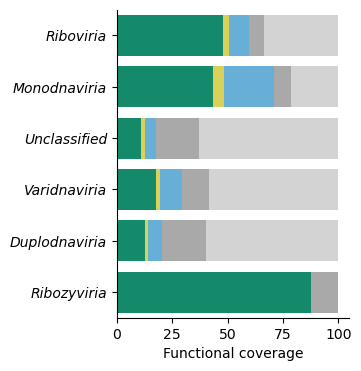

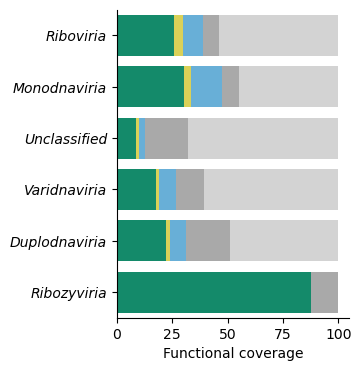

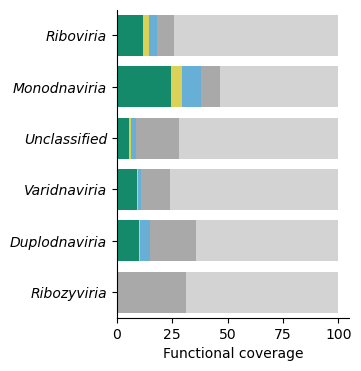

In [76]:
for analysis in ["molecular_function", "biological_process", "cellular_component"]:
    
    # change figure size
    plt.figure(figsize=(3, 4))
    sns.barplot(df_coverage, y="Realm", x=100, color='lightgrey', alpha=1)
    sns.barplot(df_coverage, y="Realm", x=f"{analysis}_singleton_percentage", color='darkgrey', alpha=1)
    sns.barplot(df_coverage, y="Realm", x=f"{analysis}_network_percentage", color='#56B4E9', alpha=1)
    sns.barplot(df_coverage, y="Realm", x=f"{analysis}_cluster_percentage", color='#F0E442', alpha=1)
    sns.barplot(df_coverage, y="Realm", x=f"{analysis}_percentage", color='#009E73', alpha=1)
    # remove the top and right lines
    sns.despine()
    # remove the y-axis label
    plt.ylabel("")
    plt.xlabel("Functional coverage")
    # make y-tick labels italic
    plt.yticks(fontstyle='italic')
    # save the figure
    plt.savefig(f"./figures/go_annotation/go_{analysis}_functional_coverage.svg", format="svg")
    #plt.savefig(f"./figures/go_{analysis}_functional_coverage.png", dpi=600, bbox_inches='tight')
    plt.show()